In [1]:
from generate import mean_match
from test import test_random, test_active
from argparse import Namespace
import numpy as np
import matplotlib.pyplot as plt
import eval
from importlib import reload
reload(eval)

<module 'eval' from '/home/vzhang/bayesian_mean_matching/perturb-CITE-seq/eval.py'>

In [2]:
seed = 1234
np.random.seed(seed)

target = 'ptb_TGFB1'
problem = mean_match(combination=False, seed=seed, target=f'{target}')

./data/graphs/dags/estimated_dag.pkl
./data/data+.pkl


## MEAN

### mean distance

In [106]:
distance = {}
for k in problem.int_pool.keys():
	distance[k] = np.linalg.norm(problem.int_pool[k][2] - problem.int_pool[target][2])**2

In [107]:
distance = {k: v for k, v in sorted(distance.items(), key=lambda item: item[1])}

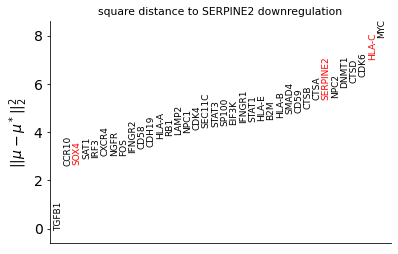

In [108]:
fig, ax = plt.subplots(figsize=(5.6,3.6))
plt.rc('font', size=9)
ax.scatter(range(36), list(distance.values()),s=0)

for i, txt in enumerate(distance.keys()):
	if txt == 'ptb_SERPINE2':
		color = 'red'
	elif txt in ['ptb_SOX4', 'ptb_HLA-C']:
		color = 'red'
	else:
		color = 'k'
	ax.annotate(txt.split('_')[1], (i, list(distance.values())[i]), rotation=90, color=color)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.ylim(-0.6,8.6)
plt.xlim(-0.5,36.5)
plt.xticks([])
plt.ylabel(r'$||\mu-\mu^*||_2^2$')
plt.title('square distance to SERPINE2 downregulation')
plt.tight_layout()
# plt.savefig('fig/rank-gene_SERPINE2-.pdf')

### expression

In [79]:
col_labels  = [None]* 36
for k in problem.int_pool.keys():
	i = np.where(problem.int_pool[k][0] != 0)[0]
	col_labels[int(i)] = k.split('_')[1]

In [80]:
# idx = np.random.randint(len(problem.ctrl_samples.T), size=300)

# samples = problem.ctrl_samples.T[idx,:]
samples = problem.ctrl_samples.T
labels = np.array(['ctrl']*samples.shape[0])


for i, ptb in enumerate(problem.int_pool.keys()):
	samples = np.vstack((samples, problem.int_pool[ptb][3].T))
	labels = np.hstack((labels, [ptb]*problem.int_pool[ptb][1]))

In [81]:
import pandas as pd
import scanpy as sc

df = pd.DataFrame(samples, dtype=np.float32)
df.columns = col_labels
adata_new = sc.AnnData(df)

/home/vzhang/miniconda3/envs/ptbctseq/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [82]:
adata_new.obs['environments'] = labels

In [10]:
labels

array(['ctrl', 'ctrl', 'ctrl', ..., 'ptb_CXCR4', 'ptb_CXCR4', 'ptb_CXCR4'],
      dtype='<U12')

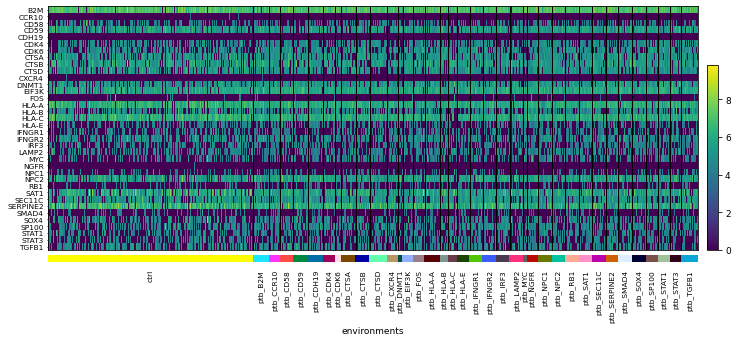

In [11]:
sc.pl.heatmap(adata_new, col_labels, groupby='environments',swap_axes=True, figsize=(12,4.8), save=False)

In [12]:
# sc.tl.rank_genes_groups(adata_new, 'environments', method='wilcoxon', reference='ctrl');
# sc.pl.rank_genes_groups(adata_new, n_genes=36, save=True);

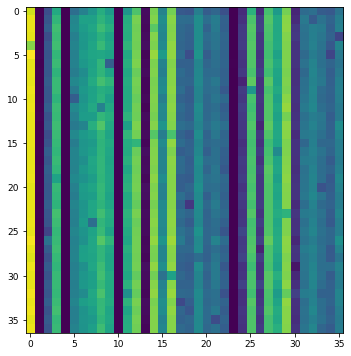

In [13]:
samples = np.vstack([problem.int_pool[k][2] for k in problem.int_pool.keys()])
# samples = samples - np.average(problem.ctrl_samples, axis=1)
samples = np.vstack([np.average(problem.ctrl_samples, axis=1),samples])

plt.figure(figsize=(6,6))
plt.imshow(samples)

In [14]:
problem.int_pool.keys()

dict_keys(['ptb_SP100', 'ptb_HLA-A', 'ptb_TGFB1', 'ptb_B2M', 'ptb_STAT3', 'ptb_CTSD', 'ptb_SOX4', 'ptb_NPC1', 'ptb_NPC2', 'ptb_CDK4', 'ptb_CTSB', 'ptb_CCR10', 'ptb_CDK6', 'ptb_HLA-B', 'ptb_EIF3K', 'ptb_SEC11C', 'ptb_SAT1', 'ptb_CDH19', 'ptb_CD59', 'ptb_STAT1', 'ptb_IRF3', 'ptb_IFNGR1', 'ptb_SERPINE2', 'ptb_CTSA', 'ptb_CD58', 'ptb_MYC', 'ptb_RB1', 'ptb_IFNGR2', 'ptb_SMAD4', 'ptb_HLA-C', 'ptb_FOS', 'ptb_DNMT1', 'ptb_HLA-E', 'ptb_NGFR', 'ptb_LAMP2', 'ptb_CXCR4'])

In [15]:
order = ['CTSB','CTSA', 'CTSD', 'TGFB1', 'IFNGR1', 'IFNGR2', 'SOX4', 'STAT3', 'STAT1', 'IRF3'] \
	+ ['CD59', 'SAT1', 'SP100', 'CD58'] \
		+ ['NPC2', 'DNMT1', 'CDK4', 'HLA-E'] \
			+ ['CDK6', 'SERPINE2', 'MYC'] \
			+ ['CCR10', 'CDH19', 'NGFR', 'SMAD4', 'RB1', 'B2M', 'EIF3K', 'HLA-C', 'FOS', 'LAMP2', 'HLA-A', 'HLA-B', 'SEC11C', 'CXCR4', 'NPC1']

order_module = ['CDH19', 'RB1', 'CD59', 'SP100', 'SOX4', 'IRF3'] \
	+ ['SMAD4', 'HLA-C', 'CTSD', 'CD58', 'CXCR4'] \
		+ ['CTSA', 'FOS', 'HLA-A', 'HLA-E', 'CDK4'] \
			+ ['NPC2', 'EIF3K', 'SAT1', 'LAMP2', 'SEC11C', 'NPC1'] \
				+ ['CCR10', 'NGFR', 'B2M', 'TGFB1', 'HLA-B'] \
					+ ['CTSB', 'CDK6', 'DNMT1', 'SERPINE2', 'IFNGR2', 'MYC', 'IFNGR1', 'STAT3', 'STAT1']

In [16]:
len(set(order_module))

36

Text(0.5, 1.0, 'Pairwise square distance')

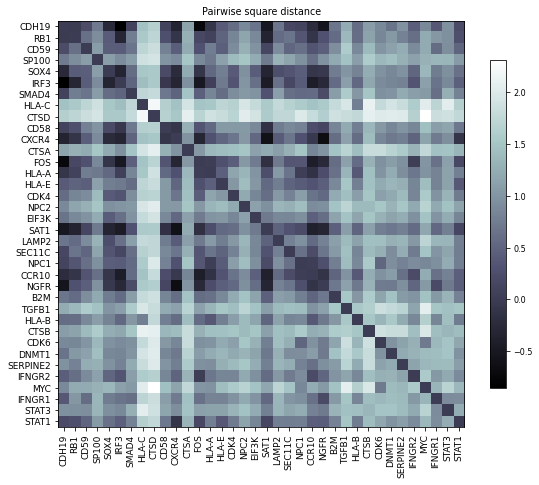

In [17]:
mean_change= np.vstack([problem.int_pool['ptb_'+k][2] - np.average(problem.ctrl_samples, axis=1) for k in order_module])

mat = np.zeros((36,36))
for i in range(36):
	for j in range(35-i):
		c = np.log(np.linalg.norm(mean_change[i]-mean_change[i+j+1])**2)
		mat[i, i+j+1] = c
		mat[i+j+1, i] = c

fig, ax = plt.subplots(1,1,figsize=(8,8))
plt.rcParams.update({'font.size': 8})
plt.imshow(mat, cmap='bone')
plt.xticks(range(36),rotation=90)
ax.set_xticklabels(order_module);
plt.yticks(range(36))
plt.colorbar(shrink=0.6)
ax.set_yticklabels(order_module);
plt.tight_layout()
plt.title('Pairwise square distance')
# plt.savefig('fig/pairwise_square_distance.pdf')

In [18]:
# from sklearn.cluster import AgglomerativeClustering
# clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.05, affinity='precomputed', linkage='complete').fit(mat)

## UMAP

In [113]:
problem.int_pool.keys()

dict_keys(['ptb_SP100', 'ptb_HLA-A', 'ptb_TGFB1', 'ptb_B2M', 'ptb_STAT3', 'ptb_CTSD', 'ptb_SOX4', 'ptb_NPC1', 'ptb_NPC2', 'ptb_CDK4', 'ptb_CTSB', 'ptb_CCR10', 'ptb_CDK6', 'ptb_HLA-B', 'ptb_EIF3K', 'ptb_SEC11C', 'ptb_SAT1', 'ptb_CDH19', 'ptb_CD59', 'ptb_STAT1', 'ptb_IRF3', 'ptb_IFNGR1', 'ptb_SERPINE2', 'ptb_CTSA', 'ptb_CD58', 'ptb_MYC', 'ptb_RB1', 'ptb_IFNGR2', 'ptb_SMAD4', 'ptb_HLA-C', 'ptb_FOS', 'ptb_DNMT1', 'ptb_HLA-E', 'ptb_NGFR', 'ptb_LAMP2', 'ptb_CXCR4'])

In [114]:
samples = problem.ctrl_samples.T
labels = np.array(['ctrl']*samples.shape[0])

j = 'ptb_EIF3K'
for i, ptb in enumerate(problem.int_pool.keys()):
	# if i == 0:
	# 	samples = problem.int_pool[ptb][3].T
	# 	labels = np.array([ptb if i==j else 0]*problem.int_pool[ptb][1])
	# else:
	if ptb == j:
		samples = np.vstack((samples, problem.int_pool[ptb][3].T))
		labels = np.hstack((labels, [ptb if ptb==j else 'ptb others']*problem.int_pool[ptb][1]))

In [115]:
def filter(sample, ctrl_samples, idx):
	gene_pp = ctrl_samples[:, idx]
	gene = sample[idx]
	if len(np.where(gene_pp>=gene)[0])/len(gene_pp) >= 0:
		return True
	else:
		return False

samples = problem.ctrl_samples.T
labels = np.array(['ctrl']*samples.shape[0])

subset = ['ptb_CDH19', 'ptb_EIF3K','ptb_HLA-C', 'ptb_MYC', 'ptb_SERPINE2', 'ptb_TGFB1']
subset_plot = np.array([True]*samples.shape[0])

j = 'ptb_FOS'
for i, ptb in enumerate(problem.int_pool.keys()):
	# if i == 0:
	# 	samples = problem.int_pool[ptb][3].T
	# 	labels = np.array([ptb if i==j else 0]*problem.int_pool[ptb][1])
	# else:
	# if ptb == j:
	idx = list(problem.int_pool.keys()).index(j)
	for sample in  problem.int_pool[ptb][3].T:
		if filter(sample, problem.ctrl_samples.T, idx):
			samples = np.vstack((samples, sample))
			labels = np.hstack((labels, [ptb]))
			if ptb in subset:
				subset_plot = np.hstack((subset_plot, [True]))
			else:
				subset_plot = np.hstack((subset_plot, [False]))

In [116]:
import umap

mapper = umap.UMAP().fit(samples)

/home/vzhang/miniconda3/envs/ptbctseq/lib/python3.9/site-packages/umap/plot.py:66: UserWarning: Trying to register the cmap 'fire' which already exists.
  plt.register_cmap("fire", fire_cmap)
/home/vzhang/miniconda3/envs/ptbctseq/lib/python3.9/site-packages/umap/plot.py:67: UserWarning: Trying to register the cmap 'darkblue' which already exists.
  plt.register_cmap("darkblue", darkblue_cmap)
/home/vzhang/miniconda3/envs/ptbctseq/lib/python3.9/site-packages/umap/plot.py:68: UserWarning: Trying to register the cmap 'darkgreen' which already exists.
  plt.register_cmap("darkgreen", darkgreen_cmap)
/home/vzhang/miniconda3/envs/ptbctseq/lib/python3.9/site-packages/umap/plot.py:69: UserWarning: Trying to register the cmap 'darkred' which already exists.
  plt.register_cmap("darkred", darkred_cmap)
/home/vzhang/miniconda3/envs/ptbctseq/lib/python3.9/site-packages/umap/plot.py:70: UserWarning: Trying to register the cmap 'darkpurple' which already exists.
  plt.register_cmap("darkpurple", dar

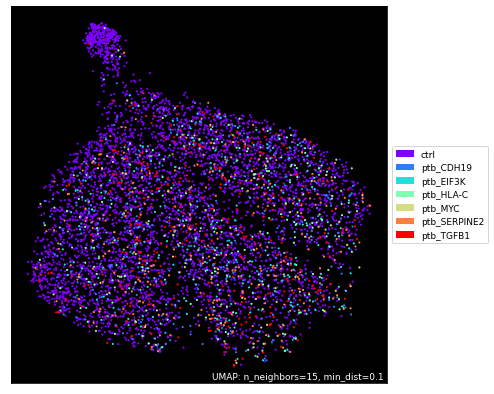

In [119]:
import umap.plot
reload(umap.plot)

ax = umap.plot.points(mapper, labels=labels, theme='fire', legend_loc='center left', width=500, height=400, legend_bbox=(1,0.5), subset_points=subset_plot) #, show_legend=False)
# ax.legend({'loc':'center left', 'bbox_to_anchor':(1, 0.5)})
# plt.savefig('fig/umap_'+j.split('_')[1]+'.pdf')
plt.tight_layout()
plt.savefig('fig/umap_all_tight.pdf')

## Expression

### box plot

In [3]:
labels = [None]* 36
for k in problem.int_pool.keys():
	i = np.where(problem.int_pool[k][0] != 0)[0]
	labels[int(i)] = k.split('_')[1]

selected_samples = None
int_samples = None
j = target

for i,ptb in enumerate(problem.int_pool.keys()):
	if ptb == j:
		selected_samples = problem.int_pool[ptb][3].T
	int_samples = problem.int_pool[ptb][3].T if int_samples is None else np.vstack((int_samples, problem.int_pool[ptb][3].T))

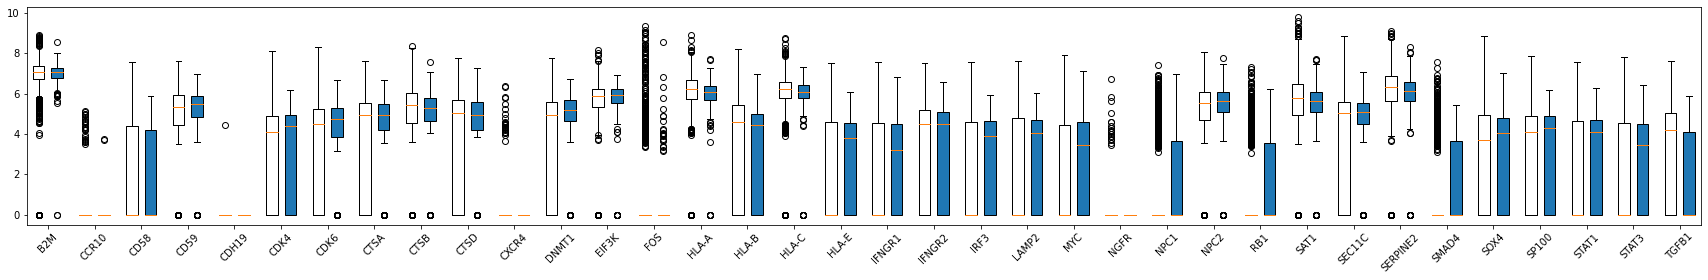

In [4]:
plt.figure(figsize=(30,4))
plt.boxplot(problem.ctrl_samples.T, positions=np.array(range(36))*2-0.4);
plt.boxplot(selected_samples, positions=np.array(range(36))*2+0.4, patch_artist=True);
plt.xticks(range(0, 36*2, 2), labels, rotation=45);
# plt.hlines(0, 0, 72, linestyles='--')

# plt.savefig('fig/boxplot_'+j.split('_')[1]+'.pdf')

### violin plot

In [58]:
samples = {'ctrl': problem.ctrl_samples.T}

for k in problem.int_pool.keys():
	samples[k] = problem.int_pool[k][3].T

In [59]:
num_samples = np.average([len(samples[k]) for k in problem.int_pool.keys()])
idx = np.random.randint(len(samples['ctrl']), size=int(num_samples))
samples['ctrl'] = samples['ctrl'][idx,:]

Text(0, 0.5, 'MYC')

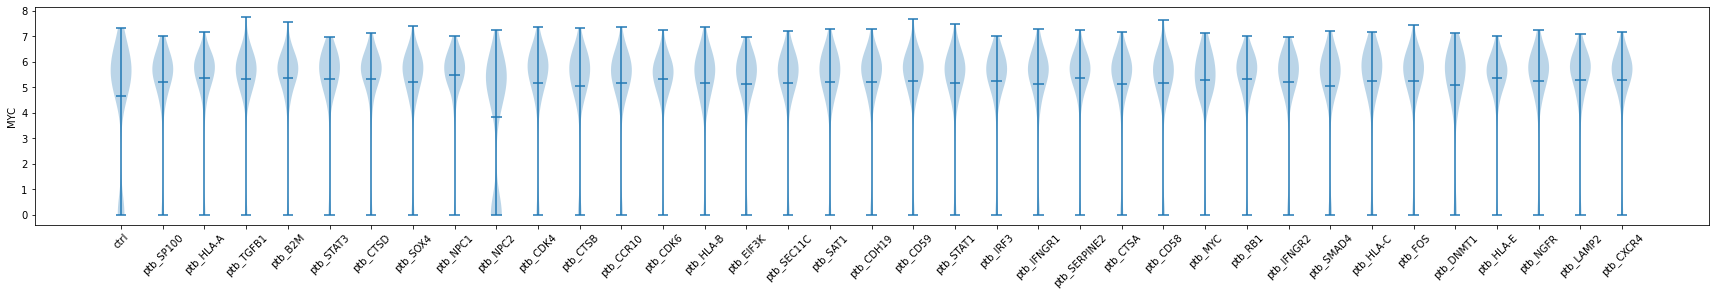

In [60]:
idx = np.where(np.array(col_labels)==target.split('_')[1])[0].item()

v_labels = ['ctrl'] + list(problem.int_pool.keys())

plt.figure(figsize=(30,4))
plt.violinplot([samples[l][:,idx].reshape(-1) for l in v_labels], showmeans=True)
plt.xticks(np.arange(1, len(v_labels) + 1), labels=v_labels, rotation=45)
plt.ylabel(target.split('_')[1])

ctrl 1.824958998679868
ptb_MYC 2.579226067088608


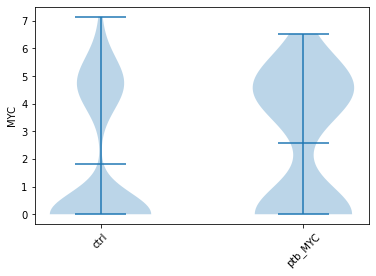

In [70]:
target = 'ptb_MYC'
idx = np.where(np.array(col_labels)==target.split('_')[1])[0].item()

v_labels = ['ctrl', target]

# plt.figure(figsize=(30,4))
plt.violinplot([samples[l][:,idx].reshape(-1) for l in v_labels], showmeans=True)
plt.xticks(np.arange(1, len(v_labels) + 1), labels=v_labels, rotation=45)
plt.ylabel(target.split('_')[1])

for l in v_labels:
	print(l, np.average(samples[l][:,idx]))

ctrl 5.982077545544555
ptb_HLA-C 4.160869359911894


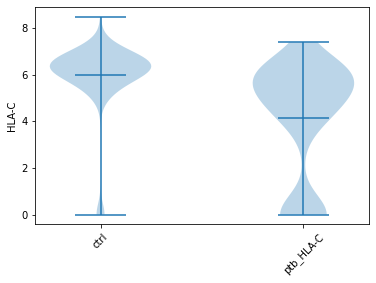

In [71]:
target = 'ptb_HLA-C'
idx = np.where(np.array(col_labels)==target.split('_')[1])[0].item()

v_labels = ['ctrl', 'ptb_HLA-C'] #,'ptb_MYC', 'ptb_HLA-C']

# plt.figure(figsize=(30,4))
plt.violinplot([samples[l][:,idx].reshape(-1) for l in v_labels], showmeans=True)
plt.xticks(np.arange(1, len(v_labels) + 1), labels=v_labels, rotation=45)
plt.ylabel(target.split('_')[1])

for l in v_labels:
	print(l, np.average(samples[l][:,idx]))

ctrl 5.193973968976898
ptb_EIF3K 4.783437716793893


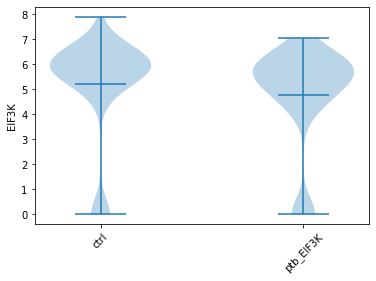

In [72]:
target = 'ptb_EIF3K'
idx = np.where(np.array(col_labels)==target.split('_')[1])[0].item()

v_labels = ['ctrl', target] #,'ptb_MYC', 'ptb_HLA-C']

# plt.figure(figsize=(30,4))
plt.violinplot([samples[l][:,idx].reshape(-1) for l in v_labels], showmeans=True)

plt.xticks(np.arange(1, len(v_labels) + 1), labels=v_labels, rotation=45)
plt.ylabel(target.split('_')[1])

for l in v_labels:
	print(l, np.average(samples[l][:,idx]))

In [191]:
# idx = np.where(np.array(labels)==target.split('_')[1])[0]

# v_labels = ['ctrl', target, 'ptb_HLA-B', 'ptb_STAT3']

# plt.violinplot([samples[l][:,idx].reshape(-1) for l in v_labels], showmeans=True)
# plt.xticks(np.arange(1, len(v_labels) + 1), labels=v_labels, rotation=45)
# plt.ylabel(target.split('_')[1])

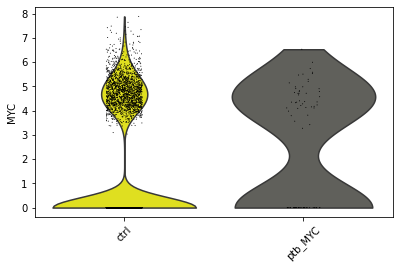

In [85]:
sc.pl.violin(adata_new, keys=['MYC'], groupby='environments', order = ['ctrl', 'ptb_MYC'], rotation=45, save=True, stripplot=True)

## Contrastive

In [120]:
import contrastive
from importlib import reload

reload(contrastive)

<module 'contrastive' from '/home/vzhang/miniconda3/envs/ptbctseq/lib/python3.9/site-packages/contrastive/__init__.py'>

In [121]:
int_samples = problem.int_pool[target][3].T
all_int_samples = None
plot_samples = problem.ctrl_samples.T
plot_labels = np.array(['ctrl'] * plot_samples.shape[0])

j = list(problem.int_pool.keys())
for i, ptb in enumerate(problem.int_pool.keys()):
	all_int_samples = problem.int_pool[ptb][3].T if all_int_samples is None else np.vstack([all_int_samples, problem.int_pool[ptb][3].T]) 
	if ptb in j:
		plot_samples = np.vstack((plot_samples, problem.int_pool[ptb][3].T))
		plot_labels = np.hstack((plot_labels, [ptb]*problem.int_pool[ptb][1]))

model = contrastive.CPCA()
proj_samples = model.fit_transform(all_int_samples, problem.ctrl_samples.T, alpha_selection='manual', alpha_value=0.66, return_alphas=True)

/home/vzhang/miniconda3/envs/ptbctseq/lib/python3.9/site-packages/contrastive/__init__.py:39: RuntimeWarning: invalid value encountered in true_divide
  standardized_array =  (array-np.mean(array,axis=0)) / np.std(array,axis=0)


In [122]:
def transform(data, model):
	sigma = model.fg_cov - 2.15 * model.bg_cov
	w, v = np.linalg.eig(sigma)
	eig_idx = np.argpartition(w, -2)[-2:]
	eig_idx = eig_idx[np.argsort(-w[eig_idx])]
	v_top = v[:,eig_idx]
	reduced_dataset = data.dot(v_top)
	reduced_dataset[:,0] = reduced_dataset[:,0]*np.sign(reduced_dataset[0,0])
	reduced_dataset[:,1] = reduced_dataset[:,1]*np.sign(reduced_dataset[0,1])
	return reduced_dataset

def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [123]:
import seaborn as sns

/home/vzhang/miniconda3/envs/ptbctseq/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vzhang/miniconda3/envs/ptbctseq/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vzhang/miniconda3/envs/ptbctseq/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

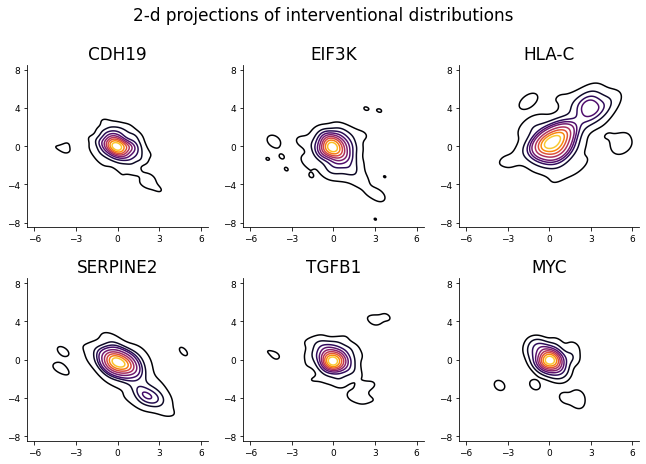

In [124]:
r = transform(plot_samples, model)

fig, axs = plt.subplots(2,3,sharey=False, figsize=(9.2,6.6))
plt.rcParams.update({'font.size': 14})

for i,l in enumerate(['ptb_CDH19','ptb_EIF3K','ptb_HLA-C', 'ptb_SERPINE2', 'ptb_TGFB1', 'ptb_MYC']):
	idx = np.where(plot_labels==l)
	sns.kdeplot(r[idx,0].reshape(-1), r[idx,1].reshape(-1), n_levels=10, shade=False, ax=axs[int(i/3)][i%3], cmap='inferno'); #, alpha=0.5)
	axs[int(i/3)][i%3].set_title(l.split('_')[1])
	axs[int(i/3)][i%3].set_yticks([-8,-4,0,4,8])
	axs[int(i/3)][i%3].set_xticks([-6,-3,0,3,6])
	axs[int(i/3)][i%3].set_ylim(-8.5,8.5)
	axs[int(i/3)][i%3].set_xlim(-6.5,6.5)
	axs[int(i/3)][i%3].spines.right.set_visible(False)
	axs[int(i/3)][i%3].spines.top.set_visible(False)
	# axs[i].set_xticks([-4,-2,0,2,4])
	# axs[i].scatter(rand_jitter(r[idx,0]), rand_jitter(r[idx,1]), alpha=0.6, label=l, s=10, color='black')
fig.suptitle('2-d projections of interventional distributions')
plt.tight_layout()
plt.savefig('fig/kde_more.pdf')

## END

In [100]:
opts = Namespace(preprocess = 'nonzero', N0=100, N=10, T=10, unique=False)
R = 50

In [101]:
from tqdm import tqdm

A = []
Prob = []
for r in tqdm(range(R)):
	a, prob = test_random(problem, opts)
	A.append(a)
	Prob.append(prob)

opts.acq = 'ivr'
opts.method = 'sphere'
A_0 = []
Prob_0 = []
for r in tqdm(range(R)):
	a, prob = test_active(problem, opts)
	A_0.append(a)
	Prob_0.append(prob)

opts.acq = 'ml2'
A_1 = []
Prob_1 = []
for r in tqdm(range(R)):
	a, prob = test_active(problem, opts)
	A_1.append(a)
	Prob_1.append(prob)

opts.acq = 'ivr'
opts.method = 'iw_approx1+'
A_2 = []
Prob_2 = []
for r in tqdm(range(R)):
	a, prob = test_active(problem, opts)
	A_2.append(a)
	Prob_2.append(prob)

opts.acq = 'mestvr'
A_3 = []
Prob_3 = []
for r in tqdm(range(R)):
	a, prob = test_active(problem, opts)
	A_3.append(a)
	Prob_3.append(prob)

opts.acq = 'svr'
A_4 = []
Prob_4 = []
for r in tqdm(range(R)):
	a, prob = test_active(problem, opts)
	A_4.append(a)
	Prob_4.append(prob)

100%|██████████| 50/50 [00:05<00:00,  9.53it/s]


<Figure size 432x288 with 0 Axes>

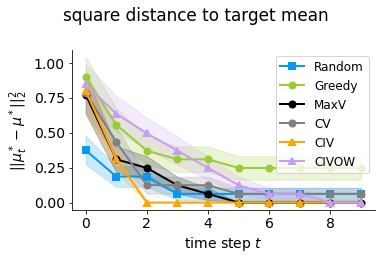

In [102]:
from importlib import reload
reload(eval)
eval.plot_mean(problem, opts, R, best=True, Random=Prob, Greedy=Prob_1, MaxV=Prob_3, CV=Prob_4, CIV=Prob_0, CIVOW=Prob_2)

# save_fig('fig/'+target.split('_')[1], 'mean-best.png')
try:
	target = target.split('_')[1]
except IndexError:
	target = target
plt.savefig(f'fig/mse-mu_{target}_full.pdf')

In [33]:
# opts.acq = 'svr'

# A_3 = []
# Prob_3 = []
# for r in range(R):
# 	a, prob = test_active(problem, opts)
# 	A_3.append(a)
# 	Prob_3.append(prob)

In [34]:
import os

def save_fig(path, file):
	if not os.path.isdir(path):
		os.makedirs(path)
	plt.savefig(os.path.join(path, file))

In [8]:
# reload(eval)
# eval.plot_hit(problem, opts, R, random=Prob, ivr=Prob_0, ml2=Prob_1)

<Figure size 432x288 with 0 Axes>

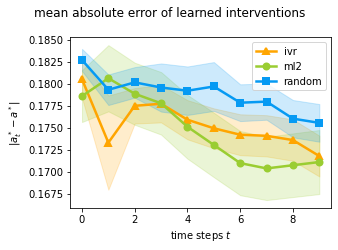

In [9]:
reload(eval)
eval.plot_guess(problem, opts, R, best=False, ivr=Prob_0, ml2=Prob_1, random=Prob) #, svr=Prob_3)

# save_fig('fig/'+target.split('_')[1], 'guess.png')

<Figure size 432x288 with 0 Axes>

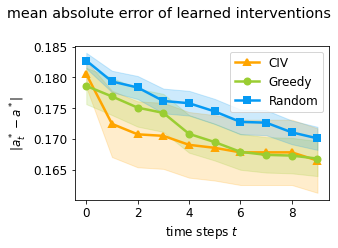

In [24]:
reload(eval)
eval.plot_guess(problem, opts, R, best=True, CIV=Prob_0, Greedy=Prob_1, Random=Prob) #, svr=Prob_3)

# save_fig('fig/'+target.split('_')[1], 'guess-best.png')
# plt.savefig('fig/mae-int_EIF3K.pdf')

<Figure size 432x288 with 0 Axes>

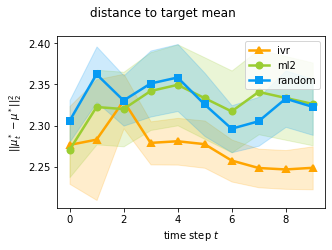

In [12]:
reload(eval)

eval.plot_mean(problem, opts, R, ivr=Prob_0, ml2=Prob_1, random=Prob) #, svr=Prob_3)

# save_fig('fig/'+target.split('_')[1], 'mean.png')

<Figure size 432x288 with 0 Axes>

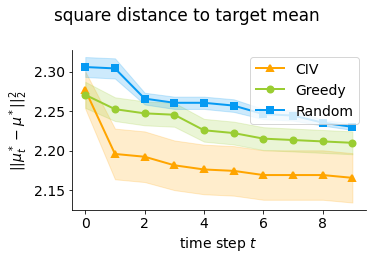

In [35]:
reload(eval)
eval.plot_mean(problem, opts, R, best=True, CIV=Prob_0, Greedy=Prob_1, Random=Prob) #, svr=Prob_3)

# save_fig('fig/'+target.split('_')[1], 'mean-best.png')
# plt.savefig('fig/mse-mu_SERPINE2.pdf')

<Figure size 432x288 with 0 Axes>

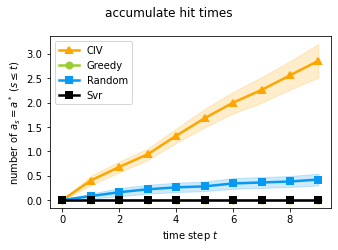

In [90]:
reload(eval)

eval.plot_a_hit(problem, opts, R, CIV=A_0, Greedy=A_1, Random=A, Svr=A_3)

# save_fig('fig/'+target.split('_')[1], 'hit.png')
# plt.savefig('fig/hit_EIF3K.pdf')

<Figure size 432x288 with 0 Axes>

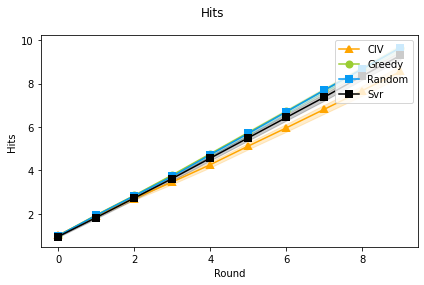

In [91]:
reload(eval)

HITS = eval.plot_hit(problem, opts, R, CIV=Prob_0, Greedy=Prob_1, Random=Prob, Svr=Prob_3)